In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report

# !pip install category_encoders
from category_encoders import LeaveOneOutEncoder, TargetEncoder

<IPython.core.display.Javascript object>

In [30]:
import warnings
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

<IPython.core.display.Javascript object>

In [9]:
gen = pd.read_csv("data/gen_playlist_tracks_full.csv")
gen = gen.drop("Unnamed: 0", 1)
run = pd.read_csv("data/running_playlist_tracks.csv")
run = run.drop("Unnamed: 0", 1)
stud = pd.read_csv("data/study_playlist_tracks_limited.csv")
stud = stud.drop("Unnamed: 0", 1)

<IPython.core.display.Javascript object>

In [10]:
gen.head()

,id,artist,title,album,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,4Oun2ylbjFKMPTiaSbbCih,Cardi B,WAP (feat. Megan Thee Stallion),WAP (feat. Megan Thee Stallion),92,0.935,0.454,1,-7.509,1,0.3750,0.0194,0.000000,0.0824,0.357,133.073,187541,4
1,2SAqBLGA283SUiwJ3xOUVI,Drake,Laugh Now Cry Later (feat. Lil Durk),Laugh Now Cry Later (feat. Lil Durk),83,0.761,0.518,0,-8.871,1,0.1340,0.2440,0.000035,0.1070,0.522,133.976,261493,4
2,3H7ihDc1dqLriiWXwsc2po,Topic,Breaking Me,Breaking Me,96,0.789,0.720,8,-5.652,0,0.2180,0.2230,0.000000,0.1290,0.664,122.031,166794,4
3,6UelLqGlWMcVH1E5c4H7lY,Harry Styles,Watermelon Sugar,Fine Line,97,0.548,0.816,0,-4.209,1,0.0465,0.1220,0.000000,0.3350,0.557,95.390,174000,4
4,7ytR5pFWmSjzHJIeQkgog4,DaBaby,ROCKSTAR (feat. Roddy Ricch),BLAME IT ON BABY,100,0.746,0.690,11,-7.956,1,0.1640,0.2470,0.000000,0.1010,0.497,89.977,181733,4


<IPython.core.display.Javascript object>

In [12]:
gen["type"] = "general"
run["type"] = "running"
stud["type"] = "study"

<IPython.core.display.Javascript object>

In [13]:
df = pd.concat([gen, run, stud])

<IPython.core.display.Javascript object>

In [97]:
mults_df = pd.DataFrame(df["id"].value_counts())
mults_df = mults_df.reset_index()

<IPython.core.display.Javascript object>

In [102]:
dup_ids = mults_df.loc[mults_df["id"] > 1]["index"].values

<IPython.core.display.Javascript object>

In [104]:
dup_ids.size

657

<IPython.core.display.Javascript object>

In [106]:
df_drop_dupes = df[~df["id"].isin(dup_ids)]

<IPython.core.display.Javascript object>

In [107]:
df_drop_dupes = df_drop_dupes.dropna()

<IPython.core.display.Javascript object>

In [27]:
df = df.dropna()

<IPython.core.display.Javascript object>

In [29]:
df.isna().sum()

id                  0
artist              0
title               0
album               0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
type                0
dtype: int64

<IPython.core.display.Javascript object>

In [182]:
drop_cols = [
    "id",
    "artist",
    "title",
    "album",
    "time_signature",
    "mode",
    "duration_ms",
    "key",
]
X = df_drop_dupes.drop(drop_cols + ["type"], 1)
y = df_drop_dupes["type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=34
)

<IPython.core.display.Javascript object>

In [164]:
print_vif(X)

VIF results
-------------------------------
const               112.432751
popularity            1.081068
danceability          1.646009
energy                4.940518
loudness              3.743760
speechiness           1.099535
acousticness          2.692809
instrumentalness      1.744420
liveness              1.083145
valence               1.655437
tempo                 1.063707
duration_ms           1.046485
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22013 entries, 0 to 4586
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        22013 non-null  int64  
 1   danceability      22013 non-null  float64
 2   energy            22013 non-null  float64
 3   key               22013 non-null  float64
 4   loudness          22013 non-null  float64
 5   mode              22013 non-null  float64
 6   speechiness       22013 non-null  float64
 7   acousticness      22013 non-null  float64
 8   instrumentalness  22013 non-null  float64
 9   liveness          22013 non-null  float64
 10  valence           22013 non-null  float64
 11  tempo             22013 non-null  float64
 12  duration_ms       22013 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 2.4 MB


<IPython.core.display.Javascript object>

In [165]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<IPython.core.display.Javascript object>

In [166]:
dtree.score(X_train, y_train)

0.9998186324889669

<IPython.core.display.Javascript object>

In [167]:
dtree.score(X_test, y_test)

0.6073500967117988

<IPython.core.display.Javascript object>

In [39]:
import time


<IPython.core.display.Javascript object>

In [168]:
grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [7, 9, 11],
    "min_samples_leaf": [60, 65, 70],
}
start_time = time.time()
dtree_cv = GridSearchCV(DecisionTreeClassifier(), grid, verbose=1, n_jobs=-1)
dtree_cv.fit(X_train, y_train)


print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.1s


--- 3.588404655456543 seconds ---


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.3s finished


<IPython.core.display.Javascript object>

In [169]:
dtree_cv.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 70}

<IPython.core.display.Javascript object>

In [170]:
dtree_cv.score(X_train, y_train)

0.7094492473248292

<IPython.core.display.Javascript object>

In [171]:
dtree_cv.score(X_test, y_test)

0.6842359767891683

<IPython.core.display.Javascript object>

In [145]:
y.value_counts(normalize=True)

general    0.602650
study      0.207235
running    0.190115
Name: type, dtype: float64

<IPython.core.display.Javascript object>

In [172]:
grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [21, 25, 29],
    "min_samples_leaf": [5, 7, 9],
}
start_time = time.time()
rfc_cv = GridSearchCV(RandomForestClassifier(), grid, verbose=1, n_jobs=-1)
rfc_cv.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   50.5s finished


--- 53.59967255592346 seconds ---


<IPython.core.display.Javascript object>

In [173]:
rfc_cv.best_params_

{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 5}

<IPython.core.display.Javascript object>

In [174]:
rfc_cv.score(X_train, y_train)

0.8826552203615259

<IPython.core.display.Javascript object>

In [175]:
rfc_cv.score(X_test, y_test)

0.7275145067698259

<IPython.core.display.Javascript object>

Both models seem to be generally underfit for the data. The decision tree is less complex by a long shot, however I do not think it's possible for me to score any better on the testing data than the random forest. Overfitting is a pretty big issue for the forest. I think I could do more tweaking but in the end it would probably result in only 3-maybe 7% better at prediction, some of which could just come down to luck.

In [159]:
import seaborn as sns

<IPython.core.display.Javascript object>

In [184]:
model_df = df_drop_dupes.drop(drop_cols, 1)

<IPython.core.display.Javascript object>

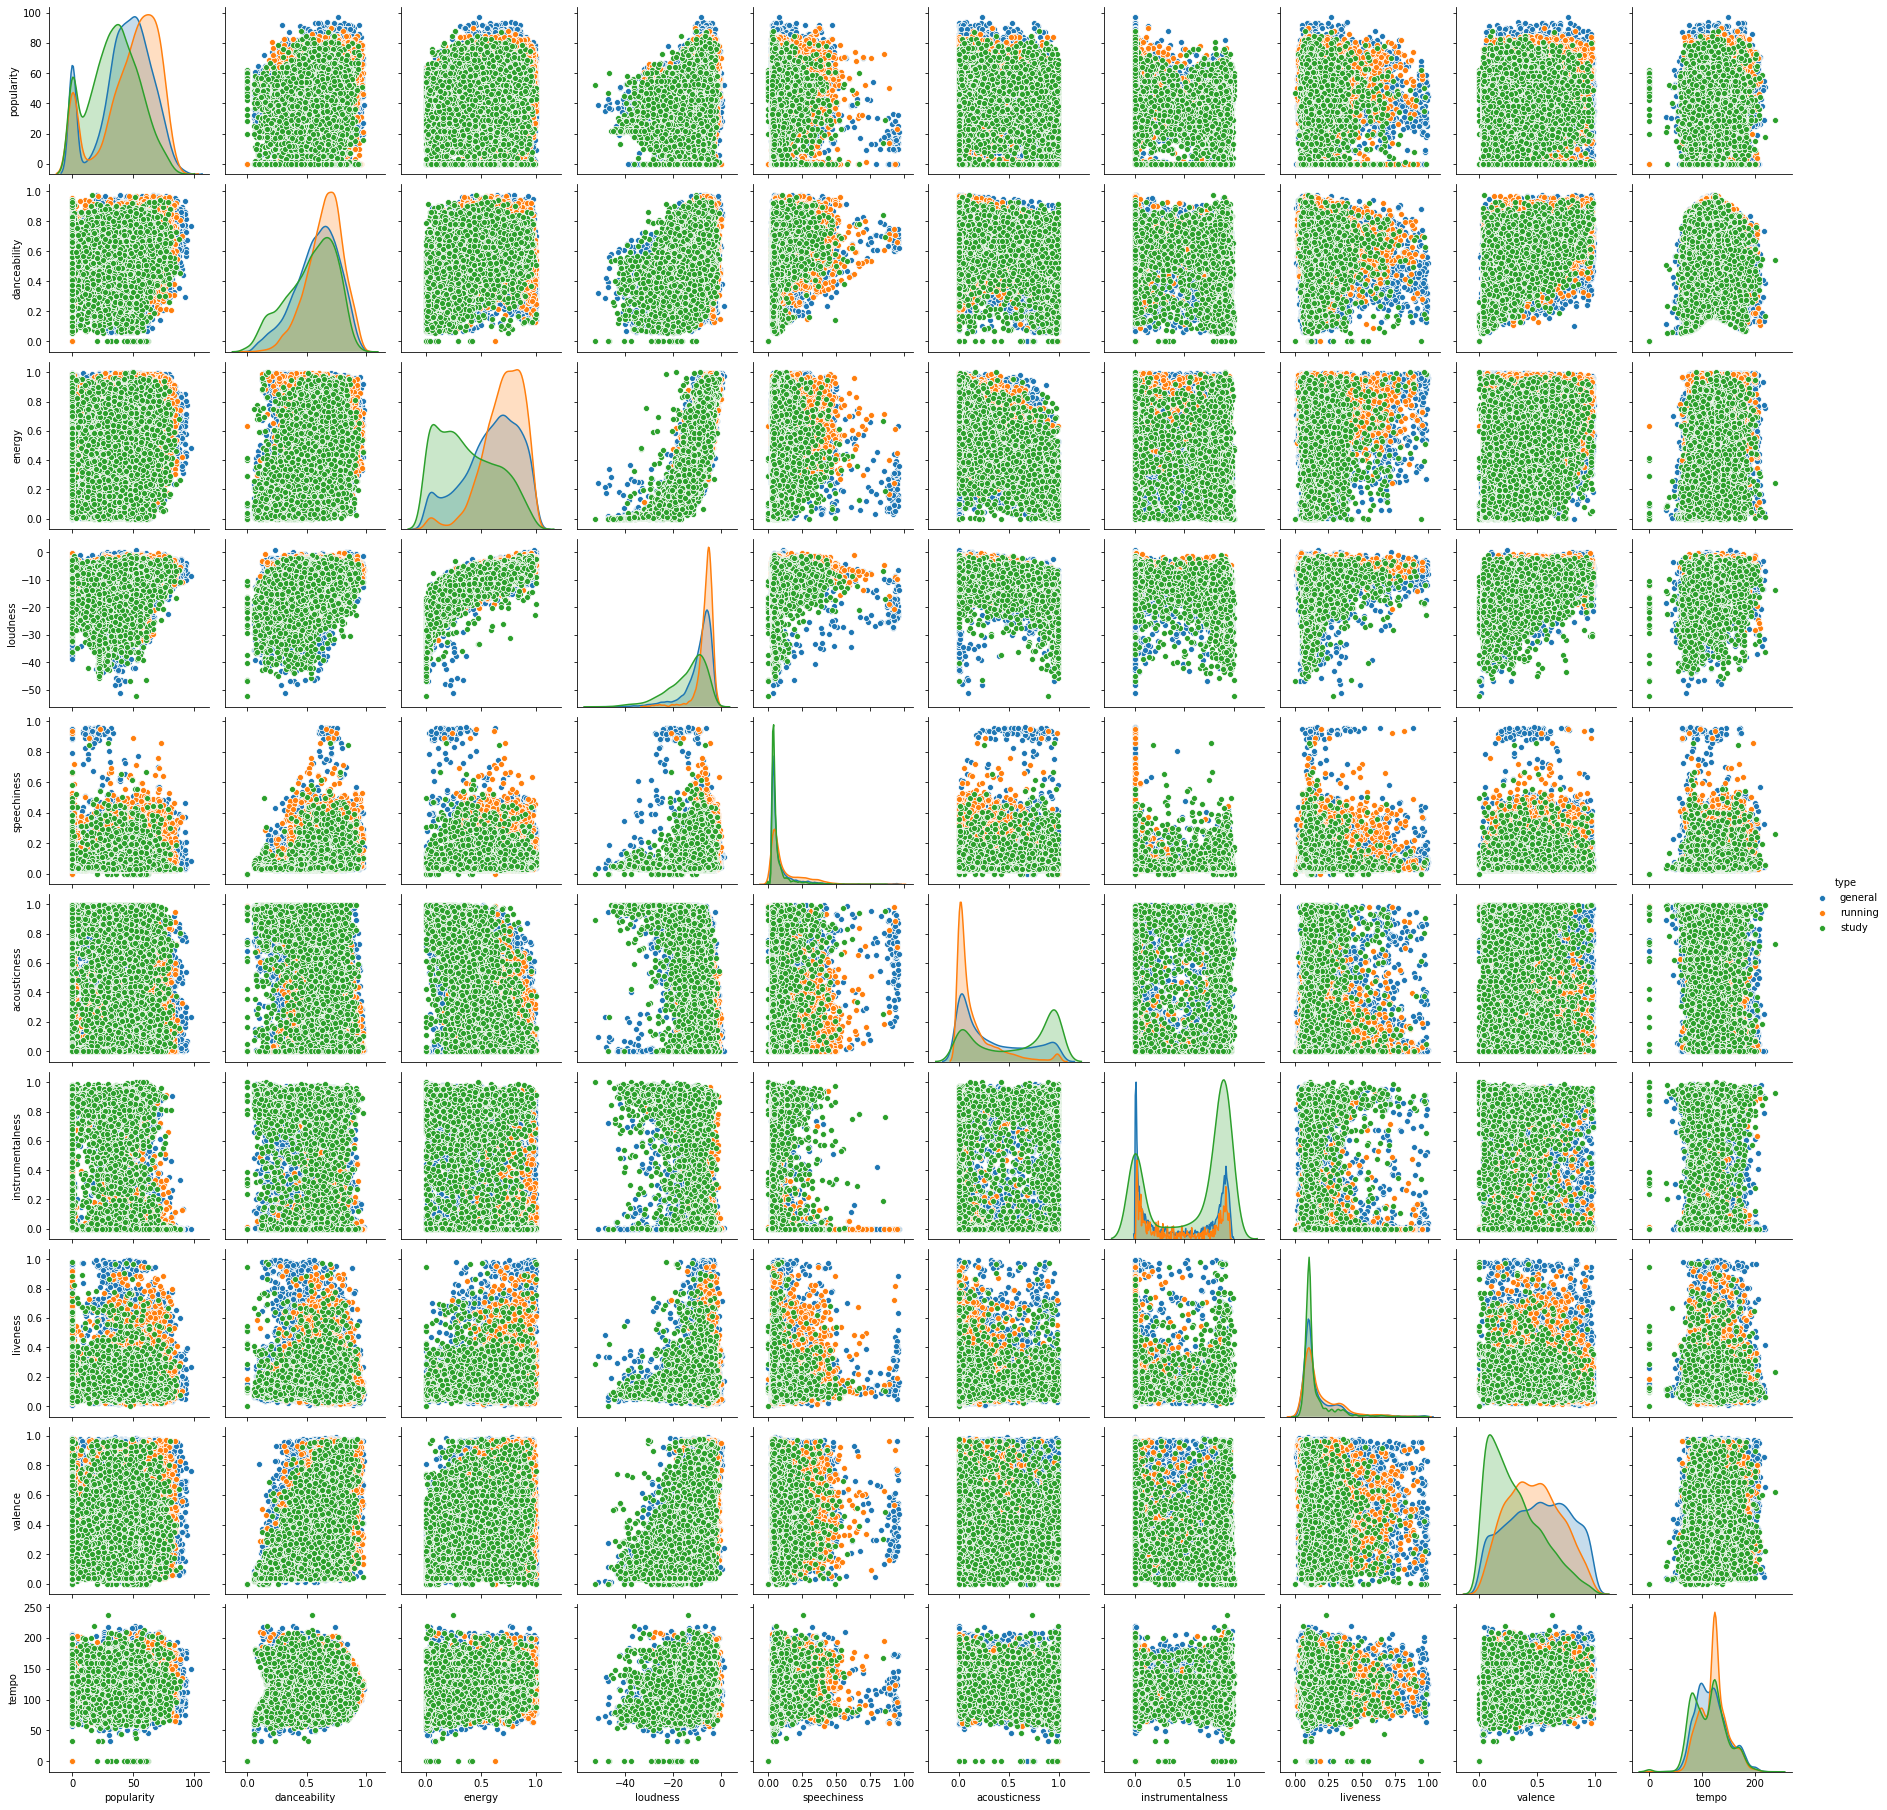

<IPython.core.display.Javascript object>

In [185]:
sns.pairplot(model_df, hue="type")

I think the shape of the data makes it quite difficult to use this type of model. There's just really not that much separation between the classes.